# Data generation

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import scipy.optimize as sco 


In [2]:
def _generate_data():
    N, r, _delta = 20, 0.3, 0.5
    
    X = np.c_[r * np.cos(np.linspace(0, 2 * np.pi, N + 1)), r * np.sin(np.linspace(0, 2 * np.pi, N + 1))][:-1]  # noqa
    for i in [1, 2]:
        X = np.r_[X, X[:N, :]-i*np.array([0, (2 + _delta) * r])]

    rs = np.random.RandomState(42)
    Y = rs.randn(N*(2+1), 2) / 100 - np.array([r/np.sqrt(2), r/np.sqrt(2)])
    Y = rs.randn(N*(2+1), 2) / 100 - np.array([0, r])

    Y = torch.from_numpy(Y).float()
    X = torch.from_numpy(X).float()
    Y.requires_grad = True
    return X, Y

# Kale Flow

In [5]:
import logging 
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.gradient_flow import gradient_flow
from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.kernels import gaussian_kernel
from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.config import LOG_LEVELS
#LOG_LEVELS['gradient_flow'] = logging.INFO

In [5]:
from kale_flow_master.kernel_wasserstein_flows.kernel_wasserstein_flows.kale import kale_penalized, kale_penalized_first_variation
def _gen():
    return X, Y

_gf_default_kwargs = dict(
    max_iter=50000,
    random_seed=20,
    noise_level_callback=lambda x: 1e-10,
    num_noisy_averages=1,
    generator=_gen,
    generator_kwargs=dict(),
    kernel=gaussian_kernel,
    kernel_kwargs={'sigma': 0.1},
    loss=kale_penalized,
    loss_first_variation=kale_penalized_first_variation
)

_kale_default_kwargs = {
    "inner_max_iter": 800,
    "inner_tol": 1e-6,
    "inner_a": 0.4,
    "inner_b": 0.8,
    "inplace": False,
    "input_check":True,
    "dual_gap_tol": 1e-2,
    "optimization_method":"newton",
}

In [6]:
results = {}

In [7]:
import time 
import numpy as np
import torch

for _lambda_, lr, exp_name in zip([0.001, 10000], [0.0001, 0.001], ['kale_0001', 'kale_10000']):
    t0 = time.time()
    X,Y = _generate_data()
    args, (X, Y), (trajectories, records, loss_states) = gradient_flow(lr=lr, loss_kwargs={**_kale_default_kwargs, 'lambda_': _lambda_}, **_gf_default_kwargs)
    print(f'total time {time.time() - t0:.3f}s')
    results[exp_name] = { 
        'args': args,
        'X': X,
        'Y': Y,
        'trajectories': trajectories,
        'records': records,
        'loss_states': loss_states
    }

 gradient_flow: X.requires_grad: False, Y.requires_grad: True
 gradient_flow: X.requires_grad: False, Y.requires_grad: True


total time 159.045s
total time 190.801s


# KKL Gradient descent

In [3]:
import divergences as dv
import kernels as kl
import generate_y as gy 

import cProfile

In [14]:
## PARAMETERS KKL ##
alpha = 0.01

## KERNEL ###
sigma = 0.65
k = lambda x,y :  kl.k_gauss(x,y,sigma)
dk = lambda x,y : kl.dk_gauss(x, y,sigma)

##DATA##
y,x = _generate_data()
x = x.detach().numpy()
y = y.detach().numpy()
n = len(x)
m = len(y)


###### Ky ####
Ky = 1/m * k(y,y) 
Ly,V = np.linalg.eig(Ky)
V = V.transpose()
Ly = np.real(Ly)
Packy = [Ky,Ly,V]

0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


C:\Users\cleme\DOC\Annee_2023_2024\code\Regularized\divergences.py:36: RuntimeWarning: invalid value encountered in log
  return np.where(t > 0, np.log(t), 0.)
C:\Users\cleme\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:155: ComplexWarning: Casting complex values to real discards the imaginary part
  stp, phi1, derphi1, task = minpack2.dcsrch(alpha1, phi1, derphi1,


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65
0.65


Text(0.5, 1.0, 'values of $KKL_{\\alpha}')

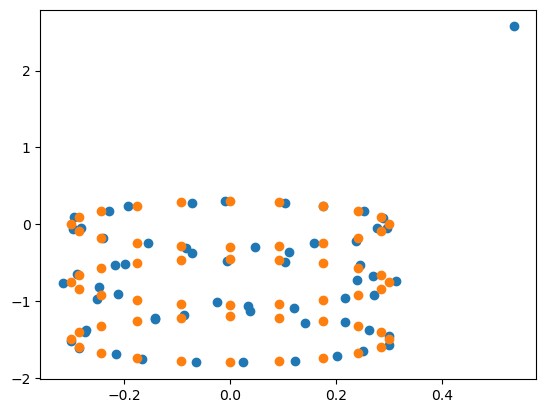

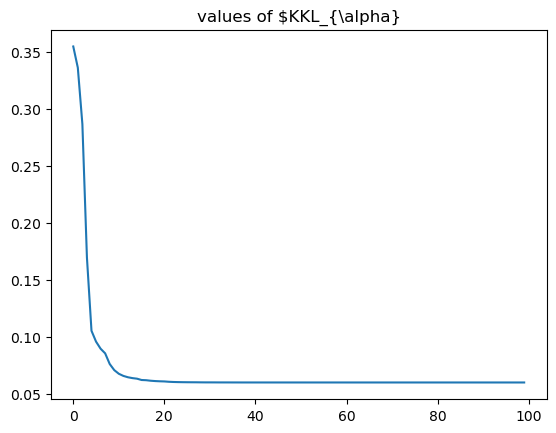

In [15]:
import time 
positions = [x]
l_J = []

def callback(x):
    positions.append(np.array([x[:n],x[n:]]).T)
    l_J.append(J1(x))

options = {'maxiter': 100}


x0 = np.hstack([x[:,0],x[:,1]])
J1 = lambda x : dv.KKL(np.array([x[:n],x[n:]]).T, y, k,Packy,alpha) 
#dJ1 = lambda x : np.hstack([np.array([dv.WGrad_KKL(np.array([x[i],x[i+n]]),np.array([x[:n],x[n:]]).T, y,k, dk,Packy,alpha,sigma) for i in range(n)])[:,0], np.array([dv.WGrad_KKL(np.array([x[i],x[i+n]]),np.array([x[:n],x[n:]]).T, y,k, dk,Packy,alpha,sigma) for i in range(n)])[:,1]]) 
dJ1 = lambda x : dv.WGrad_KKL(np.array([x[:n],x[n:]]).T, y, k, dk, Packy, alpha, sigma).flatten('F')

t0 = time.time()
result = sco.minimize(J1,x0,jac = dJ1,options= options, callback = callback)
#cProfile.run('sco.minimize(J1,x0,jac = dJ1,options= options, callback = callback)')
print(time.time() - t0)

x_fin = np.array([result.x[:n],result.x[n:]]).T

positions = np.array(positions)
l_J = np.array(l_J)

plt.scatter(x_fin[:,0],x_fin[:,1])
plt.scatter(y[:,0],y[:,1])


# fig, axs = plt.subplots(5, 4, figsize=(20,20))
# for i in range(0,len(X)-1,len(X)//20):
#     j = i//(len(X)//20)
#     #axs[j//4,j%4].axis([-3,3.5,-4,1])
#     axs[j//4,j%4].scatter(y[:,0],y[:,1],color = "orange")
#     axs[j//4,j%4].scatter(X[i,:,0], X[i,:,1], color = "blue")


plt.figure()    
plt.plot(l_J)
plt.title(r"values of $KKL_{\alpha}")


# Plots

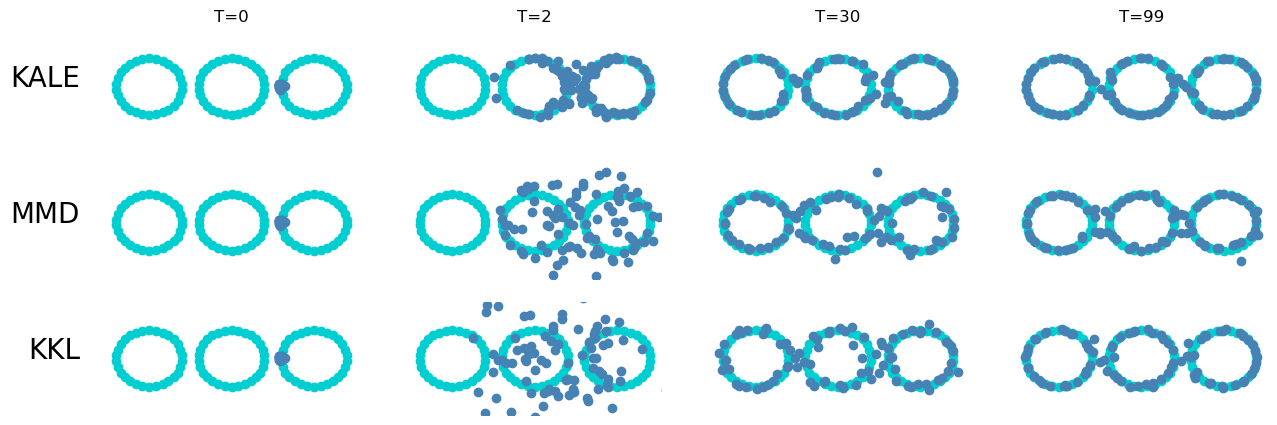

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 5))
    
iters = [0, 2, 30, 99]

axs[0,0].text(-0.1, 0.5, "KALE", size=20, transform=axs[0,0].transAxes, horizontalalignment='right')
for it,ax in zip(iters, axs[0]):
    ax.set_title(f'T={it}')
    ax.set_xlim([-1.9, 0.4])
    ax.set_ylim([-0.6, 0.6])
    ax.scatter(results["kale_0001"]['X'][:, 1], results["kale_0001"]['X'][:, 0],color = "darkturquoise")
    ax.scatter(results["kale_0001"]['trajectories'][it, :, 1], results["kale_0001"]['trajectories'][it, :, 0],color = "steelblue")
    ax.axis('off')
    
axs[1,0].text(-0.1, 0.5, "MMD", size=20, transform=axs[1,0].transAxes, horizontalalignment='right')
for it,ax in zip(iters, axs[1]):
    ax.set_xlim([-1.9, 0.4])
    ax.set_ylim([-0.6, 0.6])
    ax.scatter(results["kale_10000"]['X'][:, 1], results["kale_10000"]['X'][:, 0],color = "darkturquoise")
    ax.scatter(results["kale_10000"]['trajectories'][it, :, 1], results["kale_10000"]['trajectories'][it, :, 0],color = "steelblue")
    ax.axis('off')
    
axs[2,0].text(-0.1, 0.5, "KKL", size=20, transform=axs[2,0].transAxes, horizontalalignment='right')
for it,ax in zip(iters, axs[2]):
    ax.set_xlim([-1.9, 0.4])
    ax.set_ylim([-0.6, 0.6])
    ax.scatter(y[:,1],y[:,0],color = "darkturquoise")
    ax.scatter(positions[it][:,1],positions[it][:,0],color = "steelblue")
    ax.axis('off')
    

        

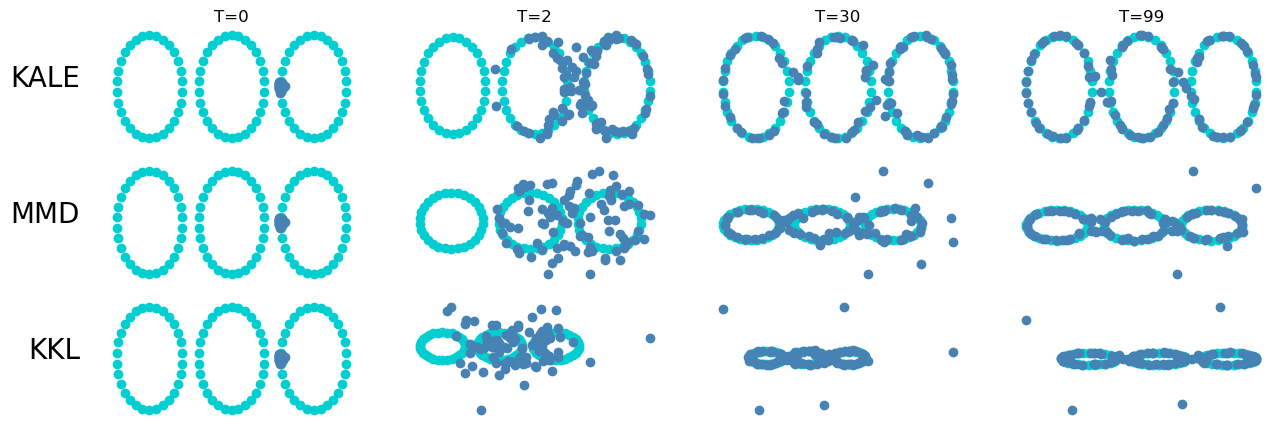

In [24]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 5))
    
iters = [0, 2, 30, 99]

axs[0,0].text(-0.1, 0.5, "KALE", size=20, transform=axs[0,0].transAxes, horizontalalignment='right')
for it,ax in zip(iters, axs[0]):
    ax.set_title(f'T={it}')
    ax.scatter(results["kale_0001"]['X'][:, 1], results["kale_0001"]['X'][:, 0],color = "darkturquoise")
    ax.scatter(results["kale_0001"]['trajectories'][it, :, 1], results["kale_0001"]['trajectories'][it, :, 0],color = "steelblue")
    ax.axis('off')
    
axs[1,0].text(-0.1, 0.5, "MMD", size=20, transform=axs[1,0].transAxes, horizontalalignment='right')
for it,ax in zip(iters, axs[1]):
    ax.scatter(results["kale_10000"]['X'][:, 1], results["kale_10000"]['X'][:, 0],color = "darkturquoise")
    ax.scatter(results["kale_10000"]['trajectories'][it, :, 1], results["kale_10000"]['trajectories'][it, :, 0],color = "steelblue")
    ax.axis('off')
    
axs[2,0].text(-0.1, 0.5, "KKL", size=20, transform=axs[2,0].transAxes, horizontalalignment='right')
for it,ax in zip(iters, axs[2]):
    ax.scatter(y[:,1],y[:,0],color = "darkturquoise")
    ax.scatter(positions[it][:,1],positions[it][:,0],color = "steelblue")
    ax.axis('off')

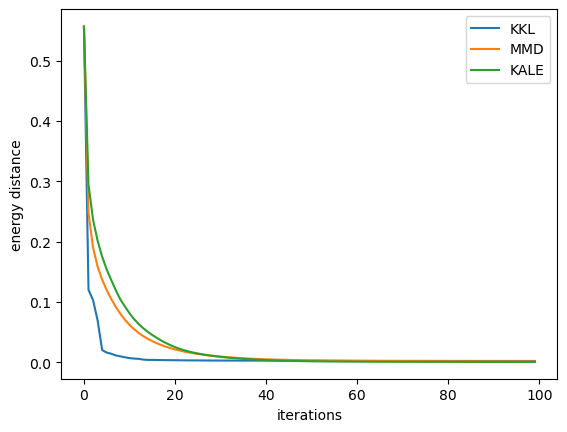

In [83]:
ED_mmd = []
ED_kale = []
ED_kkl = []
for t in range(100):
    x_t = positions[t]
    ED_kkl.append(dv.energy_distance(x_t,y))
    ED_mmd.append(dv.energy_distance(results["kale_10000"]['trajectories'][t],results["kale_10000"]['X']))
    ED_kale.append(dv.energy_distance(results["kale_0001"]['trajectories'][t],results["kale_0001"]['X']))
    

plt.plot(ED_kkl,label = "KKL" ) 
plt.plot(ED_mmd,label = "MMD" )
plt.plot(ED_kale, label = "KALE")
plt.xlabel("iterations")
plt.ylabel("energy distance")
plt.legend()
    

100

In [30]:
df_resultats_kkl = pd.DataFrame({"expe" : ["3 rings"], "alpha" : [alpha], "sigma" : [sigma], "n": [240], "m": [240], "maxiter" : [100], "y" : [y], "x_fin" : [x_fin], "positions" : [positions], "l_J" : [l_J]})
df_results_kale = pd.DataFrame({"_gf_default_kwargs" : _gf_default_kwargs,"_kale_default_kwargs" : _kale_default_kwargs, "results" : results})
df_resultats_kkl.to_csv('resultats_kkl', index=False)
df_results_kale.to_csv('results_kale', index=False)